In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import colormaps
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

from ase.data import atomic_numbers, atomic_names, atomic_masses, covalent_radii

bike = r'C:\Users\jones\Documents\Atto\Calculations\Gas\H\R_300-S_0.1\Bike/'
#pulse = np.loadtxt(path+'td.general/laser')
from ase.io import read, write
fs = 0.02418884254
nm2au = 1239.8/27.112
#mole = read(path+'strut.xyz')
#chem_syms = mole.get_chemical_symbols()
#pos = mole.positions

In [1]:
pwd

'c:\\Users\\jones\\Documents\\Atto\\Calculations\\Molecular-HHG\\Gases\\H'

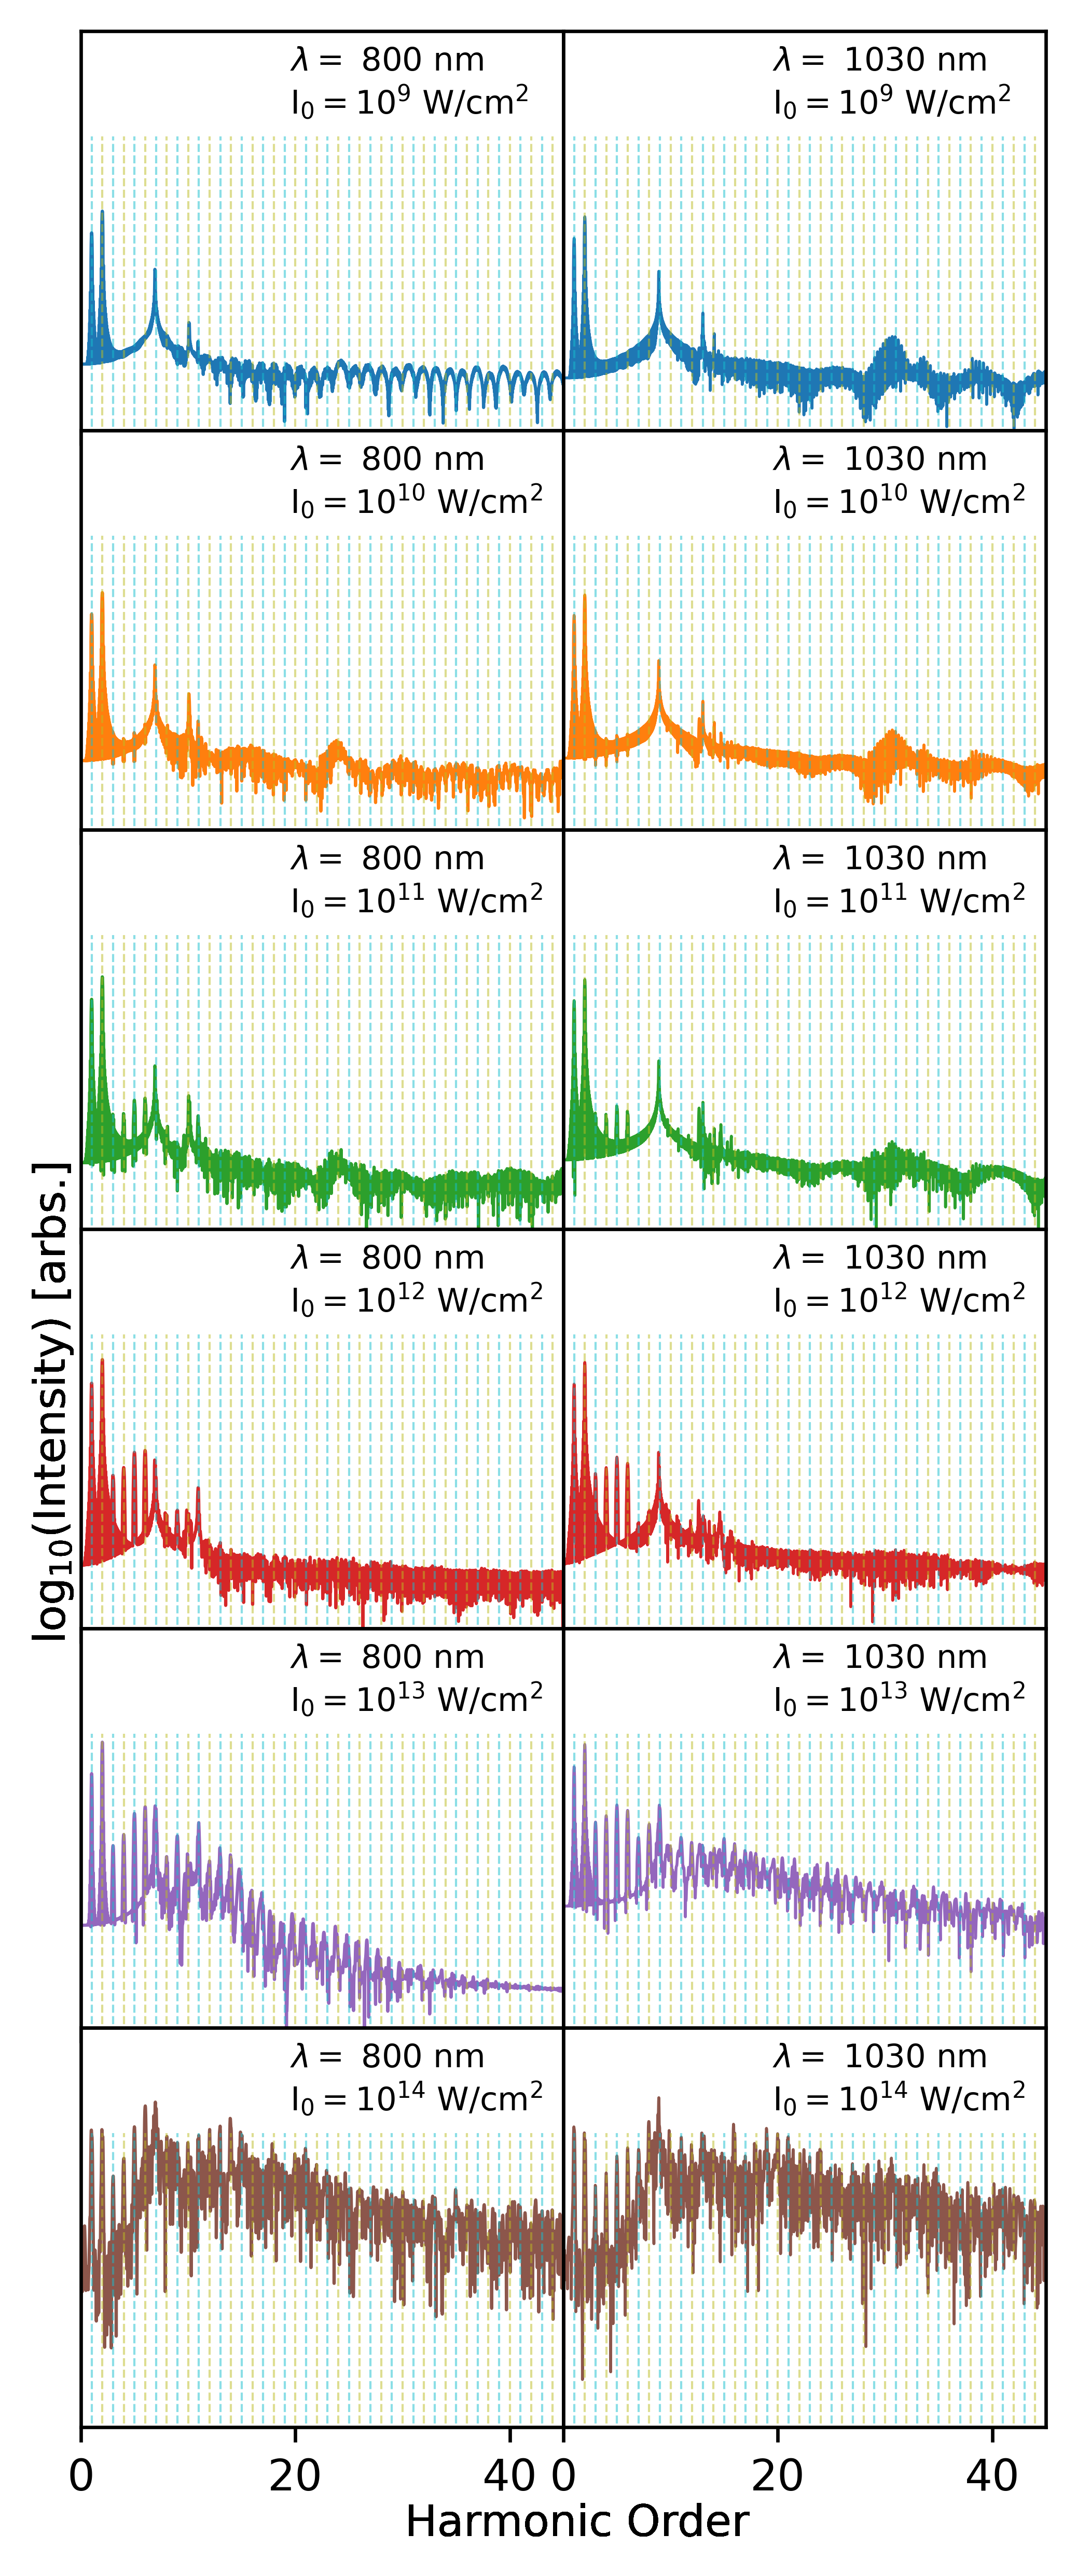

In [4]:
def H_harm_plot(path, name):

    wls = ['800/', '1030/']
    ints = ['E9/', 'E10/', 'E11/', 'E12/', 'E13/', 'E14/']
    specs = {}
    cmap = colormaps.get_cmap('tab10')
    for i,w in enumerate(ints):
        for j, intense in enumerate(wls):
            try:
                specs[intense[:-1]+'nm'+w[:-1]] = np .loadtxt(path+intense+w+'hs-mult.x')
            except Exception as e:
                print(e)
                pass
    keys = list(specs.keys())
    fig,axs = plt.subplots(nrows=6, ncols = 2, sharex = True, sharey=False)
    axs = axs.flatten()
    fig.set_size_inches(4,10)

    fig.set_dpi(600)
    fig.subplots_adjust(hspace=0, wspace=0)
    for i, k in enumerate(keys):
        scaling = np.array(1/(min(np.log10(specs[k][:,1]))))
        axs[i].set_ylim(0.025,1.35)
        if i%2==0:
            axs[i].plot(specs[k][:,0]/(nm2au/int(k.split('nm')[0])), 
                        1-np.log10(specs[k][:,1])/min(np.log10(specs[k][:,1])), 
                        color = cmap(int(i/2)%10), label = k, linewidth = 0.75)
        else:
            axs[i].plot(specs[k][:,0]/(nm2au/int(k.split('nm')[0])), 
                        1-np.log10(specs[k][:,1])/min(np.log10(specs[k][:,1])), 
                        color = cmap(int((i-1)//2)%10), linewidth = 0.67)
        axs[i].set_yticks([])
        def k_formatter(k):
            wl = k.split('nm')[0] #wl in nm
            intent = k.split('E')[-1]
            return '$\lambda =$ %s nm\nI$_{0} = 10^{%s}$ W/cm$^{2}$' %(wl, intent)
        for j in range(0,45,1):
            
            if j%2 == 0:
                axs[i].vlines(j, 0,1, color = cmap(8), linestyle = 'dashed', alpha = 0.5, linewidth = 0.5)
            elif j%2 == 1:
                axs[i].vlines(j, 0,1, color = cmap(9), linestyle = 'dashed', alpha = 0.5, linewidth = 0.5)   
        t = axs[i].text(19.5, 1.075, k_formatter(k), fontsize = 7.5)
        axs[i].set_xlim(0,45)
        fig.text(0.385, 0.075, 'Harmonic Order')
        fig.text(0.085, 0.365, 'log$_{10}$(Intensity) [arbs.]' , rotation = 90)
    
    plt.savefig(name+'.png', dpi = 600, bbox_inches = 'tight')
H_harm_plot(bike, 'H_Bike')

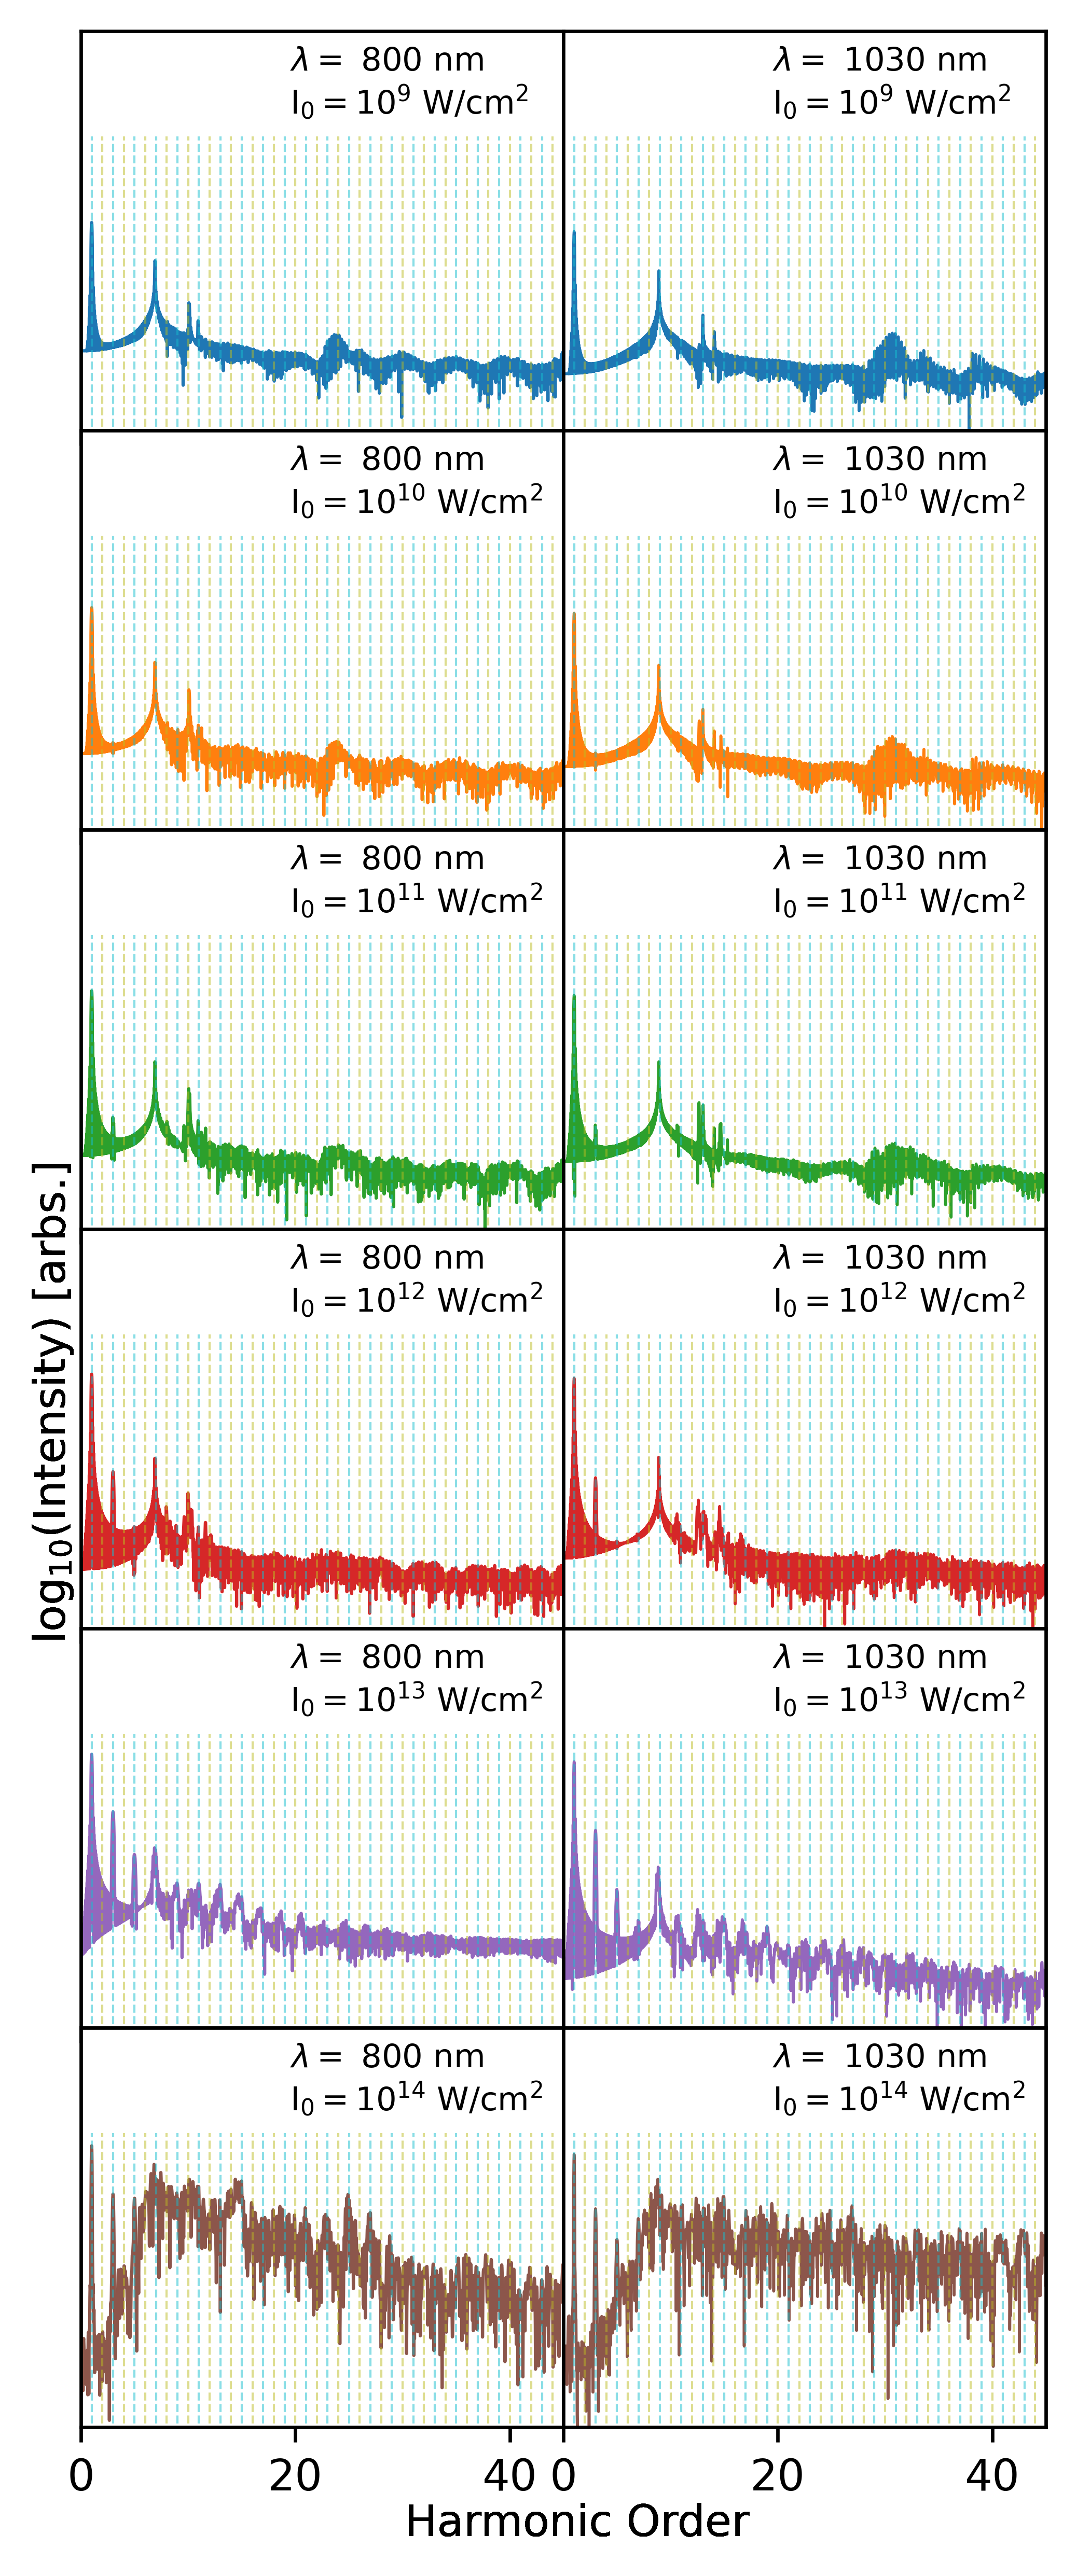

In [5]:
mono = r'C:\Users\jones\Documents\Atto\Calculations\Gas\H\R_300-S_0.1\Mono/'

H_harm_plot(mono, 'H_Mono')

In [6]:
co2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\CO2/'
orients = ['BiCircular/', 'Circular/', 'Linear/']
gs = 'static/'
dos = np.loadtxt(co2+gs+'total-dos.dat')
fermi = np.loadtxt(co2+gs+'total-dos-efermi.dat')[0,0]
evals = np.loadtxt(co2+gs+'eigenvalues')

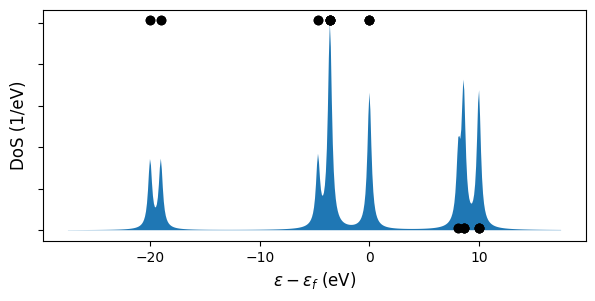

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(7,3)
ax.fill_between(27.112*(dos[:,0]-fermi), 0, dos[:,1]/max(dos[:,1]), linewidth = 6)
ax.scatter((evals[:,1]-fermi)*27.112, evals[:,2]+0.0125, color = 'k')
ax.set_yticklabels([])
ax.set_xlabel('$\epsilon - \epsilon_{f}$ (eV)', fontsize = 12)
ax.set_ylabel('DoS (1/eV)', fontsize = 12)
plt.savefig(co2+'DoS.png', dpi = 400, bbox_inches = 'tight')

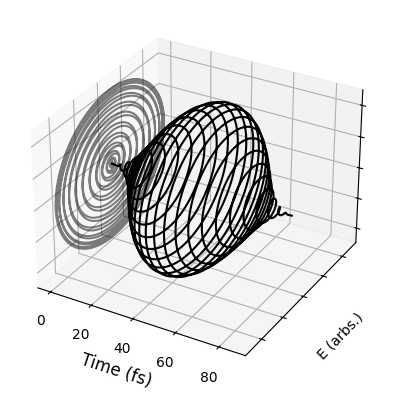

In [8]:
#First, we'll do the circularly polarised

pulse = np.loadtxt(co2+'Circular/td.general/laser')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pulse[:,1]*fs,np.real(pulse[:,2]), np.real(pulse[:,3]), color = 'k')
ax.plot(np.zeros(len(pulse[:,0])), np.real(pulse[:,2]), np.real(pulse[:,3]), color = 'k', alpha = 0.5)
ax.set_xlabel('Time (fs)', fontsize = 12)
ax.set_ylabel(r'E (arbs.)')
#ax.set_zlabel(r'E$_{z}$ ((Ha/Bohr))')
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.savefig(co2+'circ_pulse.png', bbox_inches = 'tight', dpi = 600)
plt.show()

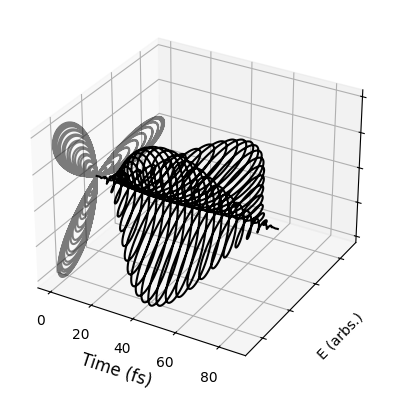

In [9]:
#Next, we'll do the trefoil polarised

pulse = np.loadtxt(co2+'BiCircular/td.general/laser')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pulse[:,1]*fs,np.real(pulse[:,2]+pulse[:,5]), np.real(pulse[:,3]+pulse[:,6]), color = 'k')
ax.plot(np.zeros(len(pulse[:,0])), np.real(pulse[:,2]+pulse[:,5]), np.real(pulse[:,3]+pulse[:,6]), color = 'k', alpha = 0.5)
ax.set_xlabel('Time (fs)', fontsize = 12)
ax.set_ylabel(r'E (arbs.)')
#ax.set_zlabel(r'E$_{z}$ ((Ha/Bohr))')
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.savefig(co2+'tref_pulse.png', bbox_inches = 'tight', dpi = 600)
plt.show()

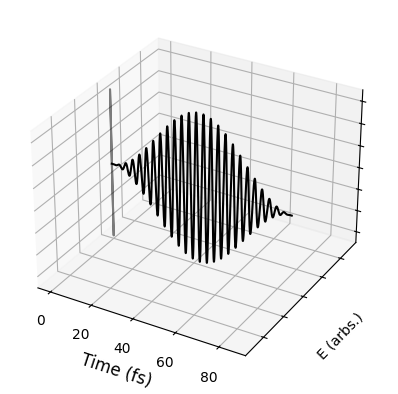

In [10]:
#Next, we'll do the trefoil polarised
#Syke! It's actually linearly polarised! 

pulse = np.loadtxt(co2+'Linear/td.general/laser')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pulse[:,1]*fs,np.real(pulse[:,3]), np.real(pulse[:,2]), color = 'k')
ax.plot(np.zeros(len(pulse[:,0])), np.real(pulse[:,3]), np.real(pulse[:,2]), color = 'k', alpha = 0.5)
ax.set_xlabel('Time (fs)', fontsize = 12)
ax.set_ylabel(r'E (arbs.)')
#ax.set_zlabel(r'E$_{z}$ ((Ha/Bohr))')
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.savefig(co2+'lin_pulse.png', bbox_inches = 'tight', dpi = 600)
plt.show()

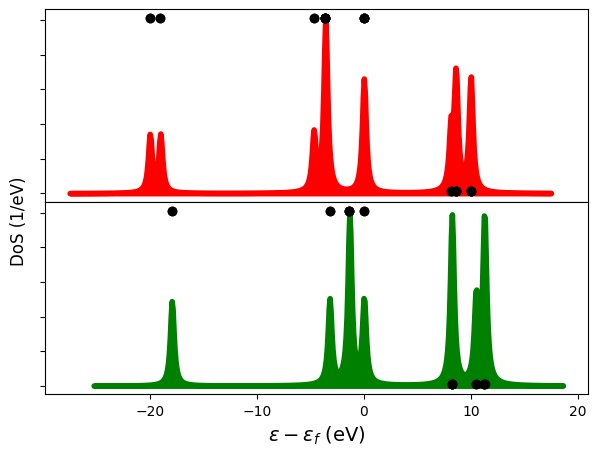

In [11]:
co2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\CO2/'
n2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\N2/'
orients = ['BiCircular/', 'Circular/', 'Linear/']
gs = 'static/'
dosc = np.loadtxt(co2+gs+'total-dos.dat')
fermic = np.loadtxt(co2+gs+'total-dos-efermi.dat')[0,0]
evalsc = np.loadtxt(co2+gs+'eigenvalues')

dosn = np.loadtxt(n2+gs+'total-dos.dat')
fermin = np.loadtxt(n2+gs+'total-dos-efermi.dat')[0,0]
evalsn = np.loadtxt(n2+gs+'eigenvalues')

fig, axs = plt.subplots(nrows=2, sharex = True)
axs=axs.flatten()
fig.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(7,5)

axs[0].fill_between(27.112*(dosc[:,0]-fermic), 0, dosc[:,1]/max(dosc[:,1]), linewidth = 4, color = 'r')

axs[0].scatter((evalsc[:,1]-fermic)*27.112, evalsc[:,2]+0.0125, color = 'k')

axs[1].fill_between(27.112*(dosn[:,0]-fermin), 0, dosn[:,1]/max(dosn[:,1]), color = 'g', linewidth = 4)

axs[1].scatter((evalsn[:,1]-fermin)*27.112, evalsn[:,2]+0.0125, color = 'k')

axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[1].set_xlabel('$\epsilon - \epsilon_{f}$ (eV)', fontsize = 14)
fig.text(0.075, 0.375,'DoS (1/eV)', rotation = 90, fontsize = 12)
plt.savefig(co2+'DoS.png', dpi = 400, bbox_inches = 'tight')

NameError: name 'cmap' is not defined

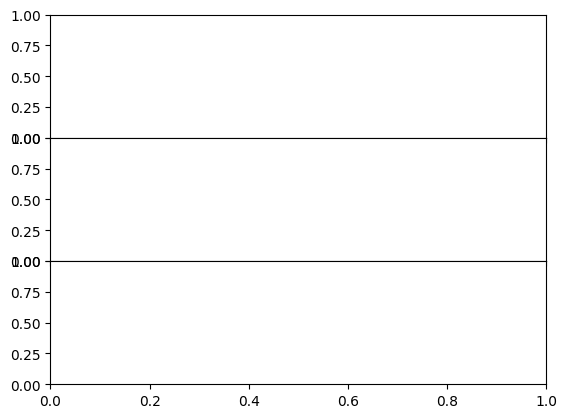

In [13]:
co2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\CO2/'
n2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\N2/'
orients = ['Linear/', 'Circular/', 'BiCircular/']

fig,axs = plt.subplots(nrows = 3, sharex = True)
axs = axs.flatten()
fig.subplots_adjust(hspace=0,wspace=0)
for i, x in enumerate(orients):
    harm = np.loadtxt(co2+x+'hs-mult.x')
    axs[i].plot(harm[:,0]/0.0443, np.log10(harm[:,1]), color = cmap(i), label = x[:-1])
    axs[i].set_xlim(0,30)
    axs[i].set_ylim(-8.75, -0.75)
    for j in range(30):
        if j%2 == 0:
            if j==0 and i == 2:
                axs[i].vlines(j, -8.75, -0.75, color = cmap(4), linestyle = 'dashed', alpha = 0.5, linewidth = 1.5, label = 'Even')
            else:
                axs[i].vlines(j, -8.75, -0.75, color = cmap(4), linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
            if j%3 == 0:
                if j==6 and i == 2:
                    axs[i].vlines(j, -8.75, -0.75, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5, label = 'Order 3')
                else:
                    axs[i].vlines(j, -8.75, -0.75, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5) 
        elif j%2 == 1:
            if j == 1 and i == 2:
                axs[i].vlines(j, -8.75, -0.75, color = cmap(3), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5, label = 'Odd')
            else:
                axs[i].vlines(j, -8.75, -0.75, color = cmap(3), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5)
            if j%3 == 0:
                axs[i].vlines(j, -8.75, -0.75, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5)   
        
            
fig.legend(ncol = 6, bbox_to_anchor = [0.965, 0.95], fontsize = 9)
axs[i].set_xlabel('Harmonic Order', fontsize = 12)
fig.text(0.025, 0.35, 'log$_{10}$(Ints.) [arbs.]', fontsize = 12, rotation = 90)
plt.savefig(co2+'CO2Harm.png', dpi = 600, bbox_inches = 'tight')

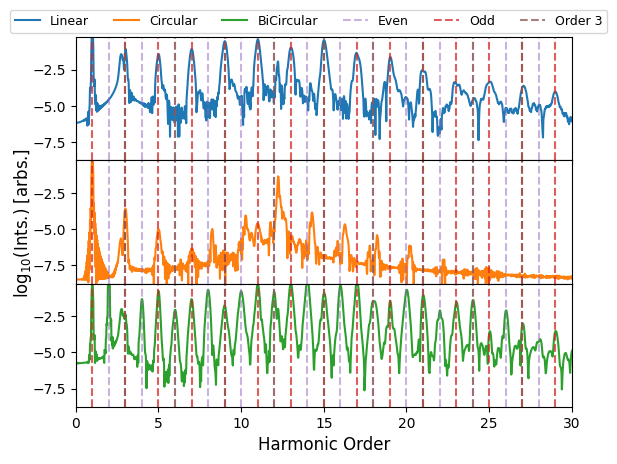

In [348]:
co2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\CO2/'
n2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\N2/'
orients = ['Linear/', 'Circular/', 'BiCircular/']

fig,axs = plt.subplots(nrows = 3, sharex = True)
axs = axs.flatten()
fig.subplots_adjust(hspace=0,wspace=0)
for i, x in enumerate(orients):
    harm = np.loadtxt(n2+x+'hs-mult.x')
    axs[i].plot(harm[:,0]/0.0443, np.log10(harm[:,1]), color = cmap(i), label = x[:-1])
    axs[i].set_xlim(0,30)
    axs[i].set_ylim(-8.75, -0.25)
    for j in range(30):
        if j%2 == 0:
            if j==0 and i == 2:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(4), linestyle = 'dashed', alpha = 0.5, linewidth = 1.5, label = 'Even')
            else:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(4), linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
            if j%3 == 0:
                if j==6 and i == 2:
                    axs[i].vlines(j, -8.75, -0.25, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5, label = 'Order 3')
                else:
                    axs[i].vlines(j, -8.75, -0.25, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5) 
        elif j%2 == 1:
            if j == 1 and i == 2:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(3), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5, label = 'Odd')
            else:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(3), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5)
            if j%3 == 0:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5)   
        
            
fig.legend(ncol = 6, bbox_to_anchor = [0.965, 0.95], fontsize = 9)
axs[i].set_xlabel('Harmonic Order', fontsize = 12)
fig.text(0.025, 0.35, 'log$_{10}$(Ints.) [arbs.]', fontsize = 12, rotation = 90)
plt.savefig(n2+'N2Harm.png', dpi = 600, bbox_inches = 'tight')

In [366]:
co2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\CO2/'
n2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\N2/'
orients = ['Linear/', 'Circular/', 'BiCircular/']
ext = 'output_iter/'
dirs = [ x for i,x in enumerate(os.listdir(co2+orients[0] + ext)) if os.path.isdir(co2+orients[0] + ext+x)]

In [373]:
acc = np.loadtxt(co2+orients[0]+'td.general/acceleration')

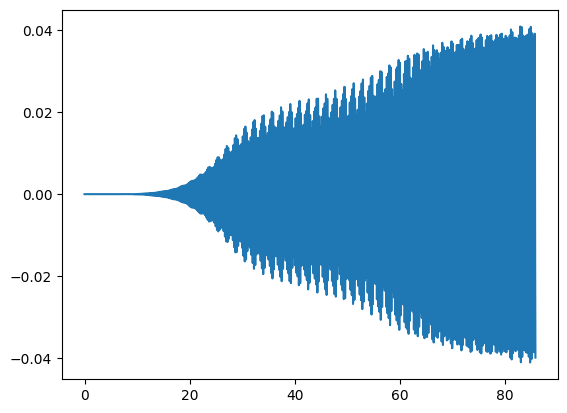

In [383]:
plt.plot(acc[:,1]*fs, acc[:,3]*1000)

In [368]:
import numpy as np
import matplotlib.pyplot as plt
import os

def ensure_dir(file_path=''):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Made a new directory.")

def planes(file, ref, New_Dir, n = 0, path=''):
    
    ensure_dir(path+New_Dir)
    

    d0 = np.loadtxt(ref)
    x = y = sorted(set(d0[:,0]))
    Map = np.zeros((len(x),len(y)))
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.startswith(file):
                filepath = os.path.join(root, name)
                di = np.loadtxt(filepath)
                d1 = np.column_stack((d0[:,0], d0[:,1], di[:,2]-d0[:,2]))
                for i,item in enumerate(d1):
                    try:
                        Map[x.index(item[0]), y.index(item[1])] = item[2]
                    except Exception as e:
                        print("Exception %s raised while handling index %i.\n" %(e,i))
                np.savetxt(path+New_Dir +'Map_%s' % str(root[-10:]).replace('td.0',''), Map)
                plt.imshow(Map.transpose(), cmap='seismic', extent=[min(x), max(x), min(y), max(y)])
                cbar = plt.colorbar()
                cbar.set_label('$\Delta$Q (a.u)')
                if n > 0:
                    plt.plot(a, b, color = 'k', linewidth = 6) 
                plt.clim(-10E-6,10E-6)  
                cbar.set_ticks([])
                plt.xlabel('x ($\AA$)')
                plt.ylabel('y ($\AA$)')
                #plt.savefig(path+New_Dir +'Density_%s.png' % str(root[-10:]).replace('td.0',''))
                plt.show()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.41832625e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.83665251e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.49980000e+04, 3.54553197e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.49990000e+04, 3.54567380e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e+04, 3.54581564e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

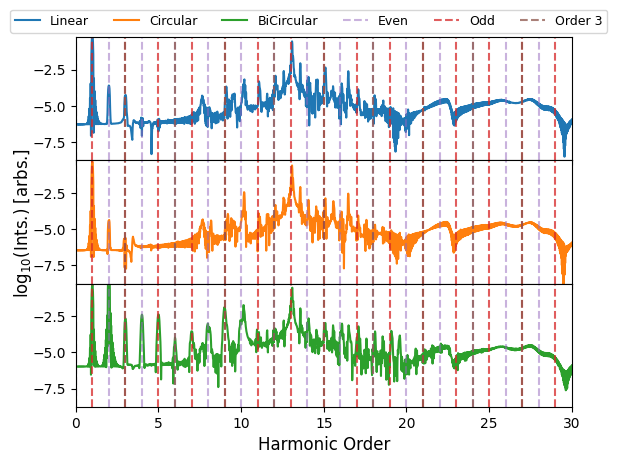

In [372]:
co2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\CO2/'
n2 = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\N2/'
n2o = r'C:\Users\jones\Documents\Atto\Calculations\Molecules\N2O/'
orients = ['Linear/', 'Circular/', 'BiCircular/']

fig,axs = plt.subplots(nrows = 3, sharex = True)
axs = axs.flatten()
fig.subplots_adjust(hspace=0,wspace=0)
for i, x in enumerate(orients):
    harm = np.loadtxt(n2o+x+'hs-mult.x')
    axs[i].plot(harm[:,0]/0.0443, np.log10(harm[:,1]), color = cmap(i), label = x[:-1])
    axs[i].set_xlim(0,30)
    axs[i].set_ylim(-8.75, -0.25)
    for j in range(30):
        if j%2 == 0:
            if j==0 and i == 2:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(4), linestyle = 'dashed', alpha = 0.5, linewidth = 1.5, label = 'Even')
            else:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(4), linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
            if j%3 == 0:
                if j==6 and i == 2:
                    axs[i].vlines(j, -8.75, -0.25, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5, label = 'Order 3')
                else:
                    axs[i].vlines(j, -8.75, -0.25, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5) 
        elif j%2 == 1:
            if j == 1 and i == 2:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(3), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5, label = 'Odd')
            else:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(3), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5)
            if j%3 == 0:
                axs[i].vlines(j, -8.75, -0.25, color = cmap(5), linestyle = 'dashed', alpha = 0.75, linewidth = 1.5)   
        
            
fig.legend(ncol = 6, bbox_to_anchor = [0.965, 0.95], fontsize = 9)
axs[i].set_xlabel('Harmonic Order', fontsize = 12)
fig.text(0.025, 0.35, 'log$_{10}$(Ints.) [arbs.]', fontsize = 12, rotation = 90)
plt.savefig(n2o+'N2OHarm.png', dpi = 600, bbox_inches = 'tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def ensure_dir(file_path=''):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Made a new directory.")

def planes(file, ref, New_Dir, n = 0, path=''):
    
    ensure_dir(path+New_Dir)

    d0 = np.loadtxt(ref)
    x = y = sorted(set(d0[:,0]))
    Map = np.zeros((len(x),len(y)))
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.startswith(file):
                filepath = os.path.join(root, name)
                di = np.loadtxt(filepath)
                d1 = np.column_stack((d0[:,0], d0[:,1], di[:,2]-d0[:,2]))
                for i,item in enumerate(d1):
                    try:
                        Map[x.index(item[0]), y.index(item[1])] = item[2]
                    except Exception as e:
                        print("Exception %s raised while handling index %i.\n" %(e,i))
                np.savetxt(path+New_Dir +'Map_%s' % str(root[-10:]).replace('td.0',''), Map)
                plt.imshow(Map.transpose(), cmap='seismic', extent=[min(x), max(x), min(y), max(y)])
                cbar = plt.colorbar()
                cbar.set_label('$\Delta$Q (a.u)')
                if n > 0:
                    plt.plot(a, b, color = 'k', linewidth = 6) 
                plt.clim(-10E-6,10E-6)  
                cbar.set_ticks([])
                plt.xlabel('x ($\AA$)')
                plt.ylabel('y ($\AA$)')
                #plt.savefig(path+New_Dir +'Density_%s.png' % str(root[-10:]).replace('td.0',''))
                plt.show()

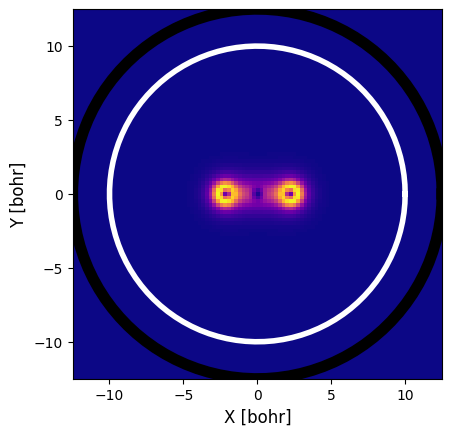

In [399]:
d0 = np.loadtxt(co2+orients[0]+gs+'density-sp1.x=0')
x = y = sorted(set(d0[:,0]))
Map = np.zeros((len(x),len(y)))
for i,item in enumerate(d0):
    Map[x.index(item[0]), y.index(item[1])] = item[2]
plt.imshow(Map, cmap='plasma', extent=[min(x), max(x), min(y), max(y)])
#cbar = plt.colorbar()
theta = np.linspace(0, 2*np.pi, 100)

r1 = 10; r2 = 12.5

a1 = r1*np.cos(theta)
b1 = r1*np.sin(theta)
a2 = r2*np.cos(theta)
b2 = r2*np.sin(theta)
plt.plot(a1, b1, color = 'w', linewidth = 4)
plt.plot(a2, b2, color = 'k', linewidth = 8)
plt.xlabel('X [bohr]', fontsize = 12)
plt.ylabel('Y [bohr]', fontsize = 12)
plt.savefig(co2+orients[0]+'gs_dens.png', dpi = 400, bbox_inches = 'tight')

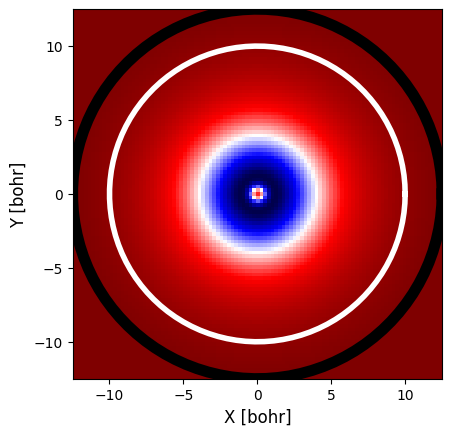

In [430]:

d0 = np.loadtxt(co2+orients[2]+'output_iter/td.0000000/'+'wf-k001-st0009.z=0')
x = y = sorted(set(d0[:,0]))
Map = np.zeros((len(x),len(y)))
for i,item in enumerate(d0):
    Map[x.index(item[0]), y.index(item[1])] = item[2]
plt.imshow(Map, cmap='seismic', extent=[min(x), max(x), min(y), max(y)])
#cbar = plt.colorbar()
theta = np.linspace(0, 2*np.pi, 100)

r1 = 10; r2 = 12.5

a1 = r1*np.cos(theta)
b1 = r1*np.sin(theta)
a2 = r2*np.cos(theta)
b2 = r2*np.sin(theta)
plt.plot(a1, b1, color = 'w', linewidth = 4)
plt.plot(a2, b2, color = 'k', linewidth = 8)
plt.xlabel('X [bohr]', fontsize = 12)
plt.ylabel('Y [bohr]', fontsize = 12)
plt.savefig(co2+orients[0]+'wf_0.png', dpi = 400, bbox_inches = 'tight')